# **PYTHON: PROJETO FINAL**

---
# **DADOS DE CREDITO: Como saber se um cliente é Inadimplente ou Adimplente**



# 1. **Situação Problema:**

Vamos explorar dados de crédito presentes neste neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv). Os dados estão no formato CSV e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de **default**, que indica se um cliente é adimplente(`default = 0`), ou inadimplente (`default = 1`), ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.

> O atributo de interesse (`default`) é conhecido como **variável resposta** ou **variável dependente**, já os demais atributos que buscam explicá-la (`idade`, `salário`, etc.) são conhecidas como **variáveis explicatívas**, **variáveis independentes** ou até **variáveis preditoras**.


| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

## 2.0 **Inicializando o Projeto**

###2.1 Inportando as bibliotecas necessarias para a realização do projeto:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Carregando e processando os dados do arquivo



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values=['na', "", 'None', 'NA', 'nan', 'Nan', 'NAN'])

In [ ]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


Agora que inportamos os dados, vamos montar a entrutura do nosso conjunto de dados.

In [ ]:
# Vamos utilizar o comando a baixo, para ver a quantidade de linhas e colunas da nossa base de dados.
df.shape

(10127, 16)

In [ ]:
# Vamos ver quantas linhas da nossa base de dados é igual a 0, ou seja quias linhas são Adimplentes
df[df['default'] == 0].shape

(8500, 16)

In [ ]:
# Vamos ver quantas linhas da nossa base de dados é igual a 1, ou seja quias linhas são Inadimplentes
df[df['default'] == 1].shape

(1627, 16)

In [ ]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [ ]:
# Agora vamos ver qual a porccentagem da nossa base de dados é adimplentes e inadimplentes
print(f"A porcentagem total de Clientes é de {round(100 * qtd_total / qtd_total, 2 )}%")
print(f"A porcentagem de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A porcentagem de clientes Inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A porcentagem total de Clientes é de 100.0%
A porcentagem de clientes adimplentes é de 83.93%
A porcentagem de clientes Inadimplentes é de 16.07%


### 2.2 Explorando colunas e seus tipos de dados (**Schema**)

In [ ]:
df.head(n=6)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24


In [ ]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

 - Atributos **categóricos**. (**Tipo str**)

In [ ]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


**OBS:** Podemos analisar que o python, interpletou a coluna **limite_credito** e **valor_transacoes_12m**. Como sendo um **Object**, sendo que essas duas colunas são do tipo **Numéricas**.

O Python fez isso pois os valores dessa coluna, estão configurados para a escrita brasileira e não americana. Com isso o python não lê os valores como sendo numéricos mas sim como object.

Para o Python interpletar esses dados da meneira certa teremos que remover o ponto que separa a centena da unidade de milhar. E substituir a virgula por ponto. Após esse tratamento o python irá entender que esses valores são numéricos e não objects

 - Atributos **numéricos**. (**Tipo int, float**)

In [ ]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()
# Agora podemos visualizar o valor total de linhas, media, desvio padrão, min, quartis e o max de cada coluna

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### 2.3 Tratando os dados Faltantes

Dados faltantes podem ser:

 - Vazios (`""`);
 - Nulos (`None`);
 - Não disponíveis ou aplicaveis (`na`, `NA`, etc.);
 - Não numérico (`nan`, `NaN`, `NAN`, etc).

In [ ]:
df.head(n=6)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24


* Agora podemos analisar quais colunas estão faltando dados.

In [ ]:
# Essa função serve para ver qual a coluna que está com o valor nulo (valor nulo = NaN).
# As colunas que estiverem com algum valor nulo o Python vai retornar True
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

* A Função abaixo nós trás algumas estatisticas sobre as colunas dos dados faltantes

In [ ]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidades': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [ ]:
# Visualizando os dados dos dois tipos de clientes inadimplentes e adimplente
print('Visualizando os dados dos dois tipos de clientes inadimplentes e adimplentes')
stats_dados_faltantes(df=df)

Visualizando os dados dos dois tipos de clientes inadimplentes e adimplentes
{'escolaridade': {'quantidades': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidades': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidades': 1112, 'porcentagem': 10.98}}


In [ ]:
# Aqui visualizamos os dados apenas dos clientes inadimplentes
print('Visualizando os dados apenas dos clientes inadimplente')
stats_dados_faltantes(df=df[df['default'] == 0])

Visualizando os dados apenas dos clientes inadimplente
{'escolaridade': {'quantidades': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidades': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidades': 925, 'porcentagem': 10.88}}


In [ ]:
# Visualizando os dados apenas dos clientes adimplente
print('Visualizando os dados apenas dos clientes adimplentes')
stats_dados_faltantes(df=df[df['default'] == 1])

Visualizando os dados apenas dos clientes adimplentes
{'escolaridade': {'quantidades': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidades': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidades': 187, 'porcentagem': 11.49}}


# 3.0 **Tratamento e limpeza de dados**

  Agora vamos aplicar o metodo data wrangling, onde consiste na transformação e limpeza dos dados para melhorar as analises. Vamos remover:
* Corrigir o schema das nossas coluna;
* Remover os dados auxentes.

### 3.1 Correção do tipo de colunas (**Schema**)

*Nessa etapa da analise, notamos que as colunas limite_credito e valor_transacoes_12m estava sendo interpretadas como colunas categóricas (* **dtype = object**).

In [ ]:
# Vamos rodar esse codígo para vermos o tipo atual dessas duas colunas
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=6)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"
5,"4.010,69","1.088,07"


* Agora vamos desenvolver uma função lambda para limpar os dados

In [ ]:
# Essa primeira linha vamos trocar os pontos por valores vazios e as virgulas por pontos. Vamos alterar de object (str) para float.
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

# Vamos testar a função através do metodo map.
valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Agora já podemos utilizar a função lambda. Pois testamos e deu certo.

In [ ]:
# Nessa primeira linha estamos, utilizando o metodo apply, onde esse metodo em python é utilizado para pegar qualquer função em python, só que indicamos a ele para utilizar a função fn que é a nossa função de tratamento de dados.
# Estamos substituindo a coluna original da base de dados, pela a mesma coluna só que aplicando o metodo de tratamento de dados. fazemos isso nas duas colunas.
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

In [ ]:
# Vamos Rodar novamente o schema
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

* Atributos **Categóricos**. (**Type = str**)

In [ ]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


* Atributos **Numéricos**. (**type = float, int**)

In [ ]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### 3.2 **Remoção de dados auxentes**

Como o pandas está ciente do que é um dados faltante, a remoção das linhas problemáticas é trivial.

In [ ]:
# Vamos utilizar o seguinte codigo abaixo para remoção da linhas que tem alguma ausencia de valor
df.dropna(inplace=True)

In [ ]:
# Vamos analisar a estrutura dos dados
# Podemos notar que antes da retirada das linhas tinhamos um total de linhas de 10127 e agora temos um total de 7081 linhas
df.shape

(7081, 16)

In [ ]:
df[df['default'] == 0].shape

(5968, 16)

In [ ]:
df[df['default'] == 1].shape

(1113, 16)

In [ ]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [ ]:
print(f"A porcentagem adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova porcentagem de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A porcentagem clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova porcentagem de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A porcentagem adimplentes ativos é de 83.93%
A nova porcentagem de clientes adimplentes é de 84.28%

A porcentagem clientes inadimplentes é de 16.07%
A nova porcentagem de clientes inadimplentes é de 15.72%


* **OBS:** Por que decidimos retirar os dados ausentes e não calcular a media ou mediana e preencher os valores ausentes?



Não fizemos isso pois analizamos que a porcentagem de dados ausentes, era equilibrado tanto para os clientes inadimplentes e clientes adimplentes. Assim notamos que se tiramos as linhas que possuem ausencia de valores, essa ação não iria prejudicar nossa analise final. Por isso optamos por utilizar esse metodo.

# 4.0 **Visualização de dados**

* Agora que os dados estão tratados e limpos, vamos criar diversas visualizações. Assim procurando entender atraves da analises dos graficos, o que faz um cliente se inadimplente e admplentes.

Vamos seprar os clientes adimplentes dos clientes inamplentes

In [ ]:
sns.set_style("whitegrid")

In [ ]:
df_adimplente = df[df['default'] == 0]

In [ ]:
df_inadimplente = df[df['default'] == 1]

## 4.1. Visualização categórias (**type = str**)

In [ ]:
df.select_dtypes('object').head(n=6)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue
8,M,sem educacao formal,solteiro,$60K - $80K,blue


* Vamos criar o primeiro grafico da coluna escolaridade, para analisarmos se o grau de escolaridade do cliente tem alguma relação com inadimplência/adimplência do cliente.

* **Escolaridade**

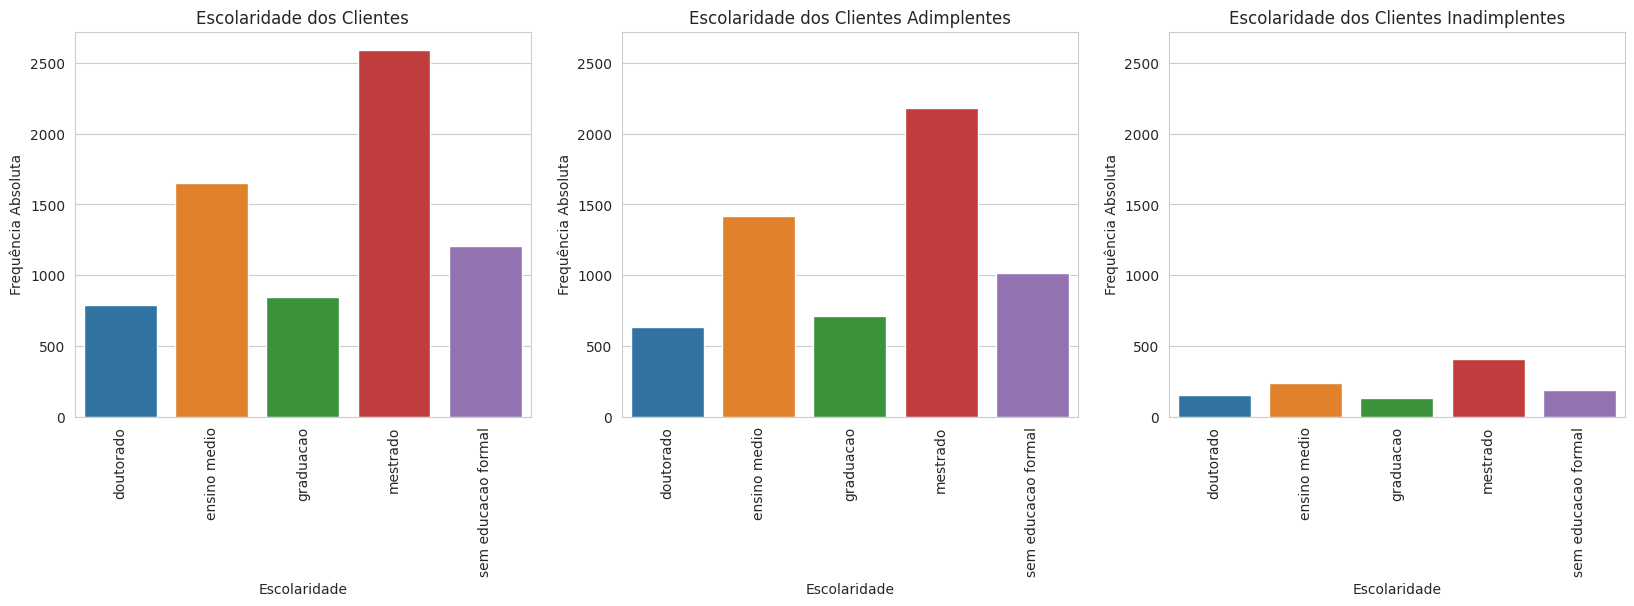

In [ ]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
# ele multiplia os valores para 1.1, para padronizar os graficos, assim ficando na mesma escala em Y
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

# plt.subplots = O subplots, permite que faça um ploat mais de uma vez. A linha, e coluna. nesse caso 3 graficos na mesma linha.
# figsize = Tamanho do layout dos graficos
# O resultado disso cai em duas variaveis, variaveis figura e eixos. O eixo é uma lista onde o primeiro grafico é o eixo 0, segundo grafico eixo1 e o terceiro grafico eixo2
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
# para cada um dos dataframe, você vai calcular a frequencia absoluta de cada um dos grupos. Como vou fazer isso?
# Você vai pegar a coluna de interesse, vou aplicar a função (value_counts()), onde essa função vai contar o id de quantas pessoas tem de cada grupo, [doutorado, ensiono medio, graduação. Após isso eu transformo em um dataframe novamente
# DEpois ele renomea algumas colunas, organiza as informações para fazer o ploat de cada grafico.

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])
# Fim do codigo

# O proximo godigo abaixo será responsavel por fazer o ploat, para isso vamos utilizar a função barploat do pacote sns
# No eixo X vamos colocar a coluna de escolaridade, no eixo Y vamos colocar a frequencia_absoluta. A frequencia absoluta, nós calculamos ali encima utilizando o value_counts
# ax = Eu vou passar qual é o meu eixo, no final do codigo eu faço o eixo += 1, para que ele vá para o proximo eixo.
  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
# Utilizamos o metodo set, para gerar o titulo, geral, eixoX e eixoY. O Titulo do eixo Y vai ser a frequencia absoluta
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
# A gente usa o metodo xticklabels, para poder gerar os tirulos de cada grupo de escolaridade do grafico, e coloco ele na posição vertical. Utilizando o metodo rotation=90
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

# Aqui eu estou garantido o meu valor maximo padronizado para todos os graficos, garantindo que o meu grafico vai de 0 até o meu valor maximo. Lembrando que calculamos o valor maximo, la encima
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Podemos analisar que o grau de escolaridade do cliente, não tem relação com o cliente ser inadimplente. Conforme analisamos o grafico, vemos que não tem uma alteração, apenas os graficos adimplentes e inadimplentes segue o grafico da escolaridade, assim não tendo anomalias em nenhum dos graficos. Com isso concluimos que o grau de escolaridadde dos clientes não influencia na inadimplencia dos tais.

* Agora vaos analisar o **Salario Anual** dos Clientes

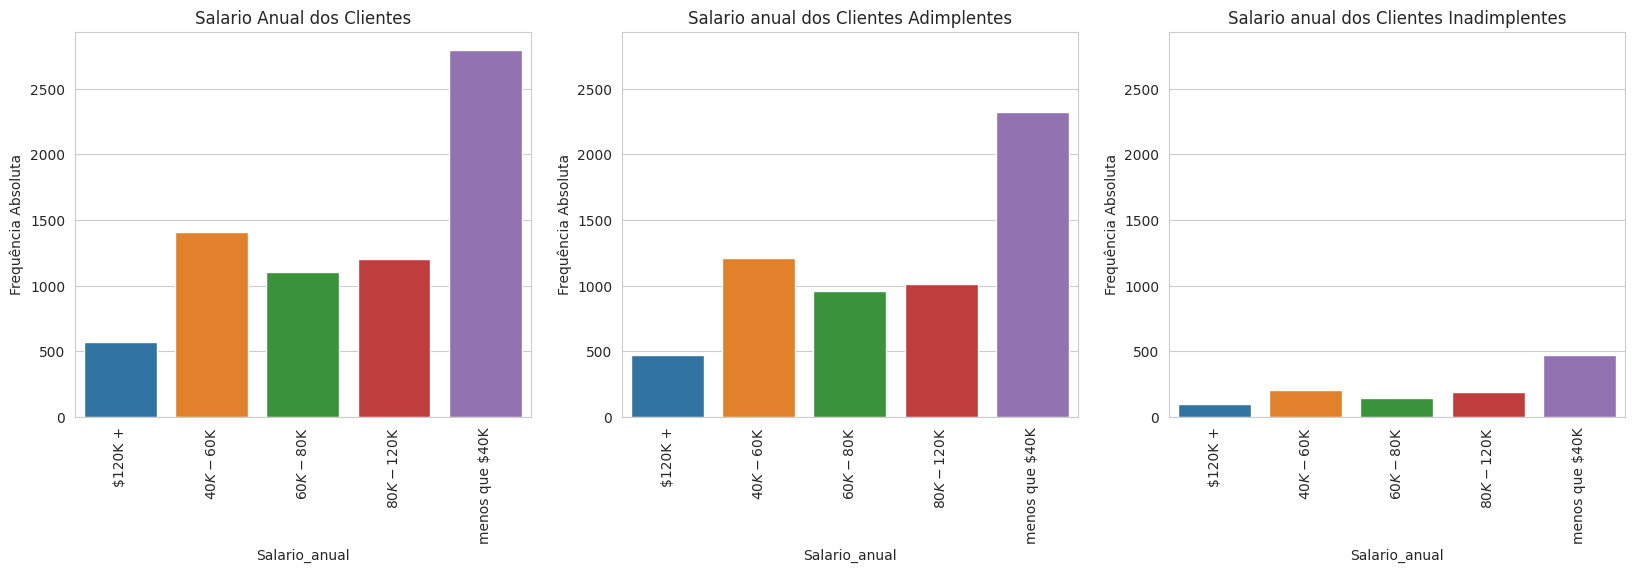

In [ ]:
coluna = 'salario_anual'
titulos = ['Salario Anual dos Clientes', 'Salario anual dos Clientes Adimplentes', 'Salario anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Bom aqui podemos notarmos que o salario anual dos clientes, não trás nenhum tipo de anamolia para nós. Já que é igual o grafico do grau de escolaridade, os graficos dos salario anual dos clientes adimplente e inadimplentes segue o grafico de salrio anual dos clientes.

Com isso chegamos a conclusão que o salario anual dos clientes não, ajudara nós a entedner o que faz um cliente ser inadmplente.



Já que os dados categóricos, não nós trás as informações que precisamos saber para que analisarmos e entendermos o que faz um cliente ser inadimplente. Vamos seguir para os dados Numéricos.

## **4.2. Visualizações numéricas**

In [ ]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


* Vamos Analisar a ** Qauntidade de Transações do ultimos 12 meses**

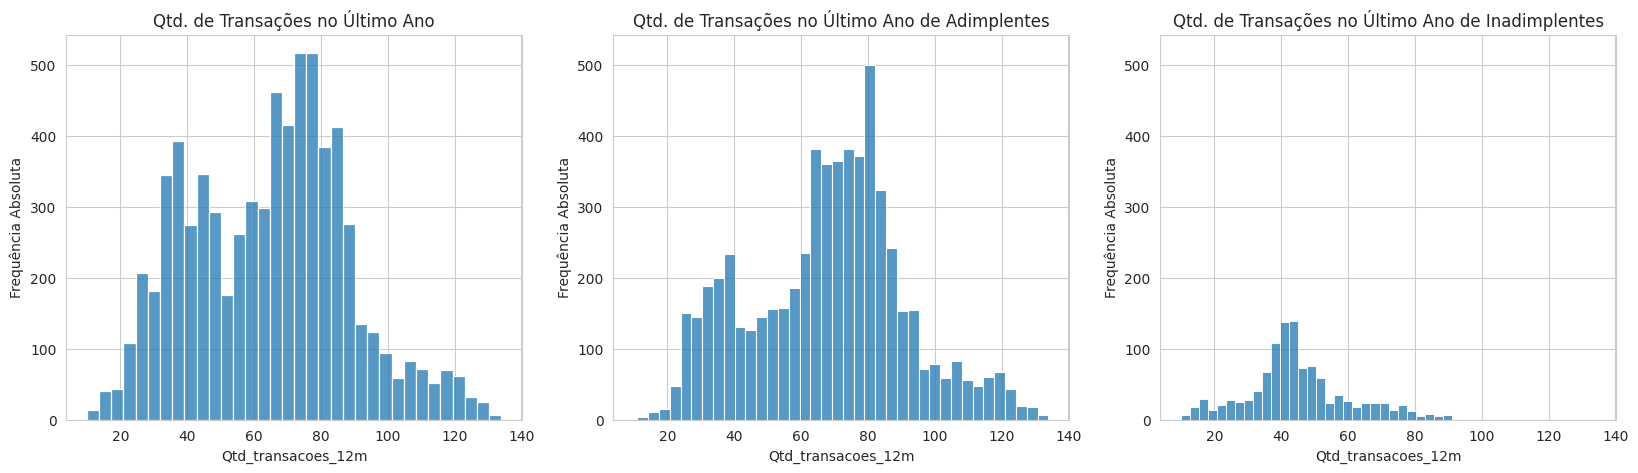

In [ ]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0 # Garante que está tudo mundo na mesma escala
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

# Aqui vamos usar a função sns,histplot, para gerar os graficos de barra. Após isso você passa a coluna X e pedir para que a função conte para nós.
  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()


Agora podemos notar que tem diferença entre os graficos. Notamos que no grafico de Qtd. de transação no Último ano de Adimplentes, os clientes adimplentes então localizados entre 60 a 90. na qtd de transações em 12 meses e a frequencia absoluta de aproximadamente entre 250 a 450

Já no grafico de Qtd. de transação no Último ano de Inadimplentes notamos quqe os clientes, inadimplentes estão com a qtd de transações entre 20 a 50 em uma frequencia absoluta de aproximadamente de 150.

Com isso concluimos que esse dado, será fundamental para nós entendermos o que faz um cliente ser Inadimplente.

* Agora vamos analisar os dados **Valor das transações nos ultimos 12 meses**

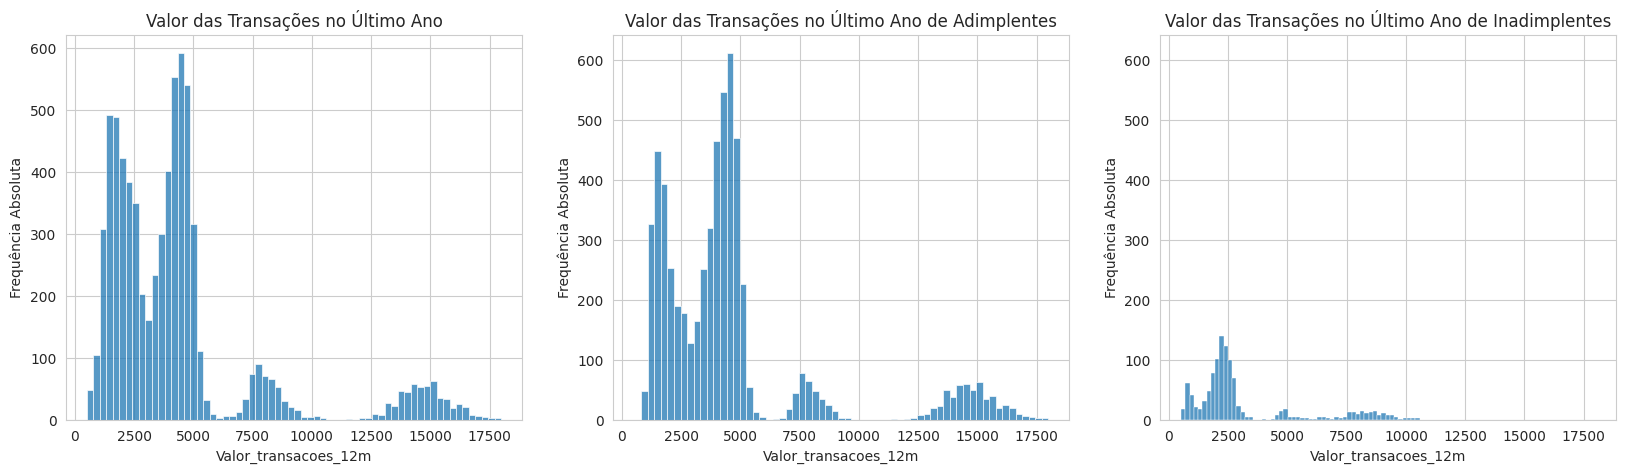

In [ ]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0 # Garante que está tudo mundo na mesma escala
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

# Aqui vamos usar a função sns,histplot, para gerar os graficos de barra. Após isso você passa a coluna X e pedir para que a função conte para nós.
  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Agora em relação ao valor de transações dos clientes, notamos algumas diferencias entre os graficos.

Bom ao analisarmos o grafico do Valor das Transações no Último Ano de Adimplentes, notamos que o valor de transações está entre 2500 a 5000, com um pequeno intervalo entre 5000 a 7500, onde no valor de 7500 a 10000 o valor sobe novamente. Depois tem uma queda no intervalo de 10000 a 12500, subindo novamente entre o valor 12500 a 17500.

Já no grafico do Valor das Transações no Último Ano de Inadimplentes, notamos que os clientes inadimplentes, o valor de transações dele está entre 1500 a 2500.

Com isso concluimos que esses dados do valor de transações é inportante para nós ajudar a entender os clientes. Concluimos que os clientes que tem menor valor de transações, esses clientes tem grande tendencia de ser inadimplentes.

**Limite de Credito ***

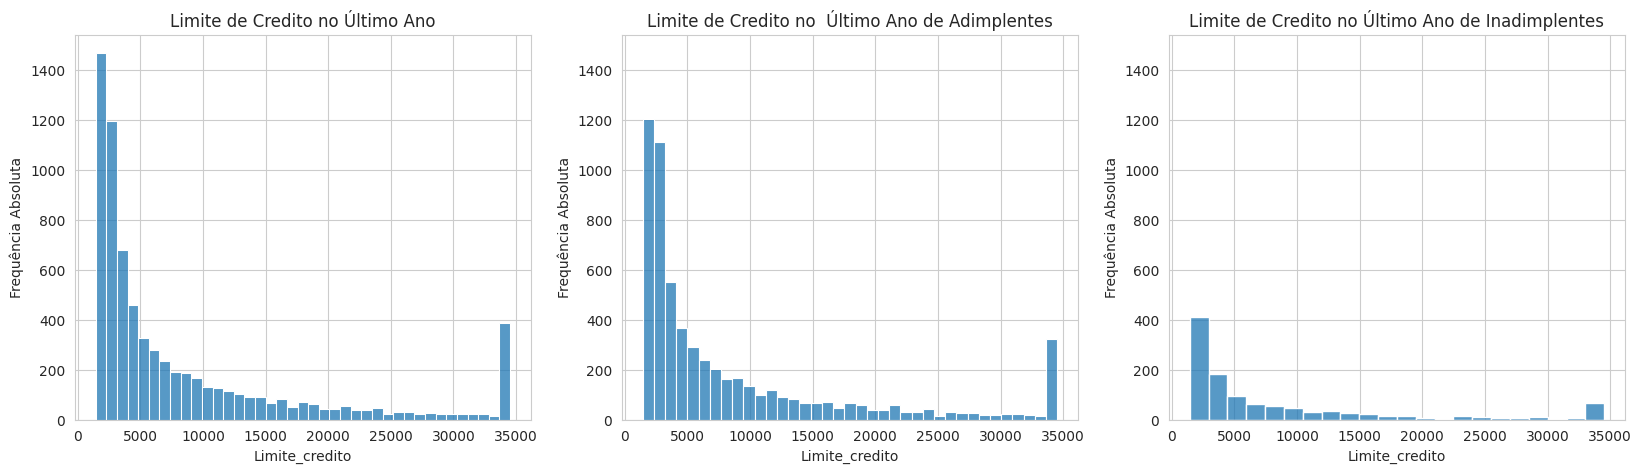

In [ ]:
coluna = 'limite_credito'
titulos = ['Limite de Credito no Último Ano', 'Limite de Credito no  Último Ano de Adimplentes', 'Limite de Credito no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Podemos analisar que o limite de credito dos clienes não é relevante para entendermos o que faz os clientes serem Inadimplentes

 - Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

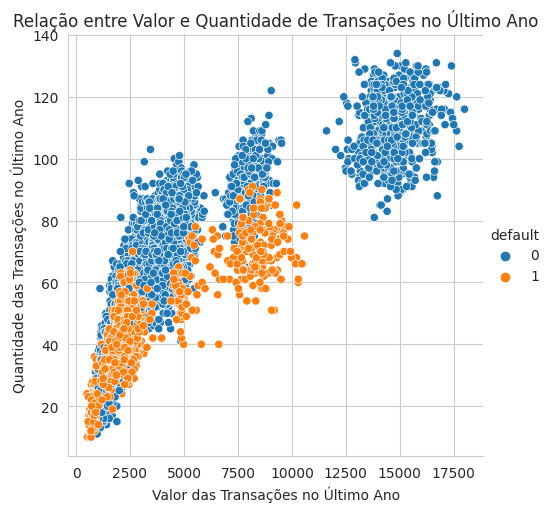

In [ ]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

# **5.0. Conclusão**

Nesse projeto onde nós tratamos os dados, tiramos as linhas com os dados vazios, analisamos os dados e fizemos o entendimento dos dados.

Após todo o processo de exploração, tratamento e analise de dados. Chegamos na conclusão que os clientes que tendem a ter menor quantidade de transações e menor valor de transações, tem a tendencia de ser um cliente inadimplente. Com isso podemos procurar esses clientes e entender o por que esses clientes não estão conseguindo comprimir o compromisso com o banco. Assim traçando um plano para ajudar a esses tipos de clientes a comprir com o compromisso com o banco.

Com a realização desse projeto podemos tambem, prevenir com que a instituição financeria venha ser preujudicada, pois os clientes que estão nessa faixa de
quantidade de transações e valor de transações tem grande tendencia a não comprir com o compromisso com a intituição financeira.

Você pode analisar esse ultimo grafico de dispesão para entender melhor, ou olhar os outros graficos tambem.
